> Created on Sun Aug  7 18:14:18 2022 @author: Richie Bao-caDesign设计(cadesign.cn)

# Python Cheat Sheet-5. 函数（function）、作用域（scope）与命名空间（namespace）、参数（arguments）

## 5.1 定义函数

不定义函数，按行执行代码可以完成一个任务，但是如果要用该组代码完成不止一次同样的计算任务，重复的复制代码，或者调整位于不同位置行的输入参数，则异常繁琐，并容易发生错误；如果所要处理的任务较为复杂，例如完成遗传算法或蚁群算法等复杂的任务，采取逐行执行代码的方式不是很现实。为了让代码书写更流畅、精简、易读，方便调试与减少出错率，及代码的迁移，重复调用，函数定义必不可免。

函数定义的基本语法如下：

```python
def name(arg1,arg2,...,argN): 
    statemetns
    return value #可以返回值，也可以移除该行，则返回值默认为空（None）
```

下述定义了两个小函数，通过获取当前时间和代码运行后时间与其差值，用于较大计算量代码运行时间长度的计算。`start_time()`函数没有输入参数，定义函数名为`start_time`，在函数内部，调入了一个时间模块`datetime`，使用`datetime.datetime.now()`方法获取当前时间，并赋值给变量`start_time`, 打印当前时间，及`return start_time`返回当前时间变量值。调用执行该函数时，如果需要接收函数的返回值，则赋值给一个变量。

第2个函数`duration(start_time)`有一个输入参数，为时间格式的值。函数块内部，同样计算了当前时间并赋值给变量`end_time`，由`(end_time-start_time).seconds/60`方法计算时间差，并将时间格式转换易读的分钟形式。这个函数没有提供返回值。

> 是在函数内，还是在函数外调用模块（module，库的部分），需要根据具体情况衡量利弊。例如，如果模块调入在文件开始，则只需要调入一次；但是如果并不是所有函数均调用该模块，而该模块可能会与其它模块（库的安装）发生冲突，或者模块自身体量庞大，而使用者只使用该模块中的其它方法时，则函数调入在特定的函数内执行会更合理。

In [1]:
def start_time():
    import datetime
    
    start_time=datetime.datetime.now()
    print("start time:",start_time)
    return start_time

def duration(start_time):
    import datetime
    
    end_time=datetime.datetime.now()
    print("end time:",end_time)
    duration=(end_time-start_time).seconds/60
    print("Total time spend:%.2f minutes"%duration)    

In [2]:
s_t=start_time()
print(type(s_t))

start time: 2022-08-10 15:04:35.491447
<class 'datetime.datetime'>


In [3]:
duration(s_t)

end time: 2022-08-10 15:07:47.462201
Total time spend:3.18 minutes


下例为应用上述组合函数的一个场景，计算代码`for i in range(10**8):value=i`运行的时间。

In [4]:
s_t=start_time()
for i in range(10**8):value=i
duration(s_t)

start time: 2022-08-10 15:08:03.651515
end time: 2022-08-10 15:08:17.364087
Total time spend:0.22 minutes


* 多态性（polymorphism）-数据类型类

一些运算不仅对于数值起作用，同样对其它类型的数据起作用，例如下述案例中定义了一个乘积函数`times(x,y)`，含两个输入参数，返回二者之积。python中并不会在赋值变量或输入参数定义时，定义变量或输入参数的数据类型，python会自动判断数据类型，并根据提供的运算返回计算结果，这样的处理方式可以减轻程序员思考的负担，也使得语言精简并富有弹性。

In [9]:
def times(x,y):
    print('- - '*3,'X={};y={}'.format(x,y))
    return (x*y)

print(times(5,7))
print(times([5],3))
print(times('polymorphism_',3))

- - - - - -  X=5;y=7
35
- - - - - -  X=[5];y=3
[5, 5, 5]
- - - - - -  X=polymorphism_;y=3
polymorphism_polymorphism_polymorphism_


SyntaxError: invalid syntax (2246857049.py, line 1)

* 函数定义的诸多考量——定义描述性统计函数

这是一个略微复杂些的例子，用于对给定的一组数据做描述性统计分析。下述示例结果是书写调试，增加对函数功能、输入和输出参数说明后的最终定稿代码段。实际编写代码过程是一个反复修改，调试的过程，这不仅包括函数功能实现的内容的修改、增补或削减；也包括功能实现过程中，结构逻辑的调整，例如是否用字典的形式先计算所有的统计量，如果给定了`measure`的方法，这样的逻辑设计将会增加无关的计算量；再者，选用何种的方式计算这些统计量，不调用库，而自行根据公式编写计算流程，或调入哪个库计算，这可以用[math](https://docs.python.org/3/library/math.html)，[statistics](https://docs.python.org/3/library/statistics.html)，[numpy](https://numpy.org/)，[pandas](https://pandas.pydata.org/),[scipy](https://scipy.org/)等任何方法，如果需要调入多个库，往往需要综合考虑，尽量减少库的调入数量；而返回值的形式也需要认真考虑，如果需要返回值参与到其它计算中，则字符串表述形式的返回形式是不合适的，需要考虑直接返回具体的数值。对于函数的定义，在实际的数据分析时，考虑的内容会因为所要解决问题的不同而存在差异，需要具体情况具体分析。

在PCS_4中，例举的函数是将一段代码调整为函数定义，这个过程需要注意对变量名的重新定义，和重复代码段的调整；而该处的函数定义则直接定义函数，不涉及代码的转换，变量名的定义时，就已经考量到命名的一般性，以及上述所考量的内容。因此，在实际代码书写时，非必要单行时，则直接以函数形式定义，建议避免由逐行再转换为函数形式，因为转换过程会耗费不必要的精力。

In [13]:
def descriptive_statistics(data,measure=None,decimals=2):
    '''
    计算给定数值列表的描述性统计值，包括数量、均值、标准差、方差、中位数、众数、最小值和最大值。
    
    
    Parameters
    ----------
    data : list(numerical)
        待统计的数值列表.
    measure : str, optional
        包括：'count', 'mean', 'std', 'variance', 'median', 'mode', 'min', 'max'. The default is None.
    decimals : int, optional
        小数位数. The default is 2.

    Returns
    -------
    dict
        如果不给定参数measure，则以字典形式返回所有值；否则返回给定measure对应值的表述字符串.

    '''
    import statistics
    
    d_s={
        'count':len(data), #样本数
        'mean':round(statistics.mean(data),decimals), #均值
        'std':round(statistics.stdev(data),decimals), #标准差
        'variance': round(statistics.variance(data),decimals), #方差 
        'median':statistics.median(data), #中位数
        'mode':statistics.mode(data), #众数
        'min':min(data), #最小值
        'max':max(data), #最大值        
        }
    
    if measure:
        #return '{}={}'.format(measure,d_s[measure])
        return d_s[measure]
    
    else:
        return d_s
    
ranmen_price_lst=[700,850,600,650,980,750,500,890,880,
                 700,890,720,680,650,790,670,680,900,
                 880,720,850,700,780,850,750,780,590,
                 650,580,750,800,550,750,700,600,800,
                 800,880,790,790,780,600,690,680,650,
                 890,930,650,777,700]
d_s_1=descriptive_statistics(ranmen_price_lst)
print(d_s_1)
print('--'*30)
d_s_2=descriptive_statistics(ranmen_price_lst,'variance')
print(d_s_2)
d_s_3=descriptive_statistics(ranmen_price_lst,measure='mean',decimals=1)
print(d_s_3)

{'count': 50, 'mean': 743.34, 'std': 108.26, 'variance': 11720.64, 'median': 750.0, 'mode': 700, 'min': 500, 'max': 980}
------------------------------------------------------------
std=108.26
mean=743.3


In [16]:
d_s_2=descriptive_statistics(ranmen_price_lst,'variance',decimals=5)
print(d_s_2)

variance=11720.63714


In [12]:
def d_s(dat_lst):
    
    dat_max=max(dat_lst)
    
    
    return dat_max
    
    
ranmen_price_lst=[700,850,600,650,980,750,500,890,880]
dat_max=d_s(ranmen_price_lst)
print(dat_max)

980


## 5.2 作用域（scope）和命名空间（namespace）

* 对作用域的描述

python中变量的访问权限取决于该变量赋值的位置，这个位置所在的代码块称为该变量所属的作用域。首先需要明确作用域是一个嵌套的关系，如下图；同时需要明确这作用域的嵌套关系作用于一个文件（或模块，module），如果要使用另一个文件内定义的方法（函数），或属性（变量），则需要使用`import`方法调入模块。整个模块（或文件）即为内置作用域，包含python自身内置函数所包括的各类函数或方法名称，例如示例中的`print()`函数，及`open()`，`range()`等，可以通过`import builtins;print(dir(builtins))`查看所有内容。内置作用域可以访问函数外定义的变量，但是无法访问函数内定义的变量，除非使用`global`关键字，将在函数内（局部作用域）定义的变量声明为全局变量，从而函数外也可以访问。闭包局部作用域是函数内作用域，只有函数内对象可以访问的变量，但是如果含有嵌套函数，则嵌套函数形成一个局部作用域，嵌套函数外的对象无法访问，并以此类推，除非使用`nonlocal`关键字，当将嵌套局部作用域外定义的变量在嵌套局部作用域内更新时，嵌套局部作用域外的变量值也会发生对应改变。从上述描述可以注意到，作用域是从外层作用域中剥离内层作用域的过程，外层作用域无法访问内层作用域变量，而内层作用域可以访问外层作用域变量。如果外层作用域要访问内层作用域，则需要是使用`global`或`nonlocal`关键字，其中`global`可以在任何内层作用域中使用，将变量声明为全局变量；但`nonlocal`仅作用于函数内使用，并需要在外层存在由该变量名，只是在内层操作更新该变量时，外层的变量对应更新。

通常将这4个作用域Built-in Scope, Global Scope, Enclosed Local Scope和Nested Local Scope，缩写为B,G,E,L。

* 命名空间

命名空间是为了防止项目中命名冲突的一种机制。如果代码量较大，项目内定义的变量名较多，必然容易发生重复命名的事件，而命名空间与作用域对应，即为命名空间，不同作用域之间变量名没有关联，可以用同样的名称在不同作用域中定义，但是需要注意不能与python内置函数名称和关键字名称同。可以将命名空间对应作用域分为内置名称（Built-tin Names），全局名称（Global Names）和局部名称（Local Names）。命名空间的查找顺序为局部名称-->全局名称-->内置名称，如果找不到变量，则会引发`NameError`异常。

> 内层作用域要访问外层作用域的变量，最好是通过函数的输入参数调入，而不是直接使用，避免在局部代码迁移时发生变量名未找到的错误，也能够更好清晰的组织代码结构，避免内外层命名混乱，削弱了代码易读性。

__LEGB Rule__

<img src="./imgs/scope_and_namespace_GNL.jpg" height='auto' width='auto' title="caDesign">

In [1]:
G_1=3.5
G_2=6.0

def outer():
    L_E_1=5.3
    
    #global L_E_2
    L_E_2=7.9
    
    L_E_N_3=78
    
    def inner():
        L_N_1=6.7         
        
        global L_N_2
        L_N_2=5.5
        
        nonlocal L_E_N_3
        L_E_N_3+=1
        
        print('Nested Scope:\nG_1={};\nG_2={};\nL_E_1={};\nL_E_2={};\nL_N_1={}\nL_N_2={};\nL_N_3={}'.format(G_1,G_2,L_E_1,L_E_2,L_N_1,L_N_2,L_E_N_3))
    
    print("_"*50)
    print('L_E_N_3={} in Enclosd Scope.'.format( L_E_N_3))
    inner()
    
outer()

print('--'*30)
print('Global Scope:\nG_1={};\nG_2={};\nL_E_2={};\nL_N_2={}'.format(G_1,G_2,L_E_2,L_N_2))

__________________________________________________
L_E_N_3=78 in Enclosd Scope.
Nested Scope:
G_1=3.5;
G_2=6.0;
L_E_1=5.3;
L_E_2=7.9;
L_N_1=6.7
L_N_2=5.5;
L_N_3=79
------------------------------------------------------------


NameError: name 'L_E_2' is not defined

外层作用域无法访问内层作用域中定义的变量

In [30]:
print(L_E_1)

NameError: name 'L_E_1' is not defined

In [12]:
import builtins
print(dir(builtins))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'SyntaxWarning', 'SystemError

* 局部作用域对全局作用域变量的更新

在配置参数时，参数值往往需要配置为不同值观察比较计算结果，例如如果参数值为全局变量，可以定义下述示例函数来更新该变量，使得代码易读、不容易发生混淆，尤其避免不容易查找到的错误出现。

In [3]:
g_var=5927

def setGvar(new_Gvar):
    global g_var
    g_var=new_Gvar

setGvar(9527888888887777778)    
print(g_var)

9527888888887777778


## 5.3 工厂函数（Factory Functions）

工厂函数类似于类方法（Class，称为工厂方法）的本质，可以实例化外层函数，再显式的调用嵌套函数，只是只能返回一个嵌套函数，而不能并行多个内层函数。整个过程为当调用外层函数，并将其赋值给一个变量`ds`，即实例化，该变量称为实例化对象，此时运行到嵌套函数时只是完成对嵌套函数的定义，并不执行该函数；当执行实例化对象时`ds(ranmen_price_lst)`，将会完成对内层函数的调用。

In [56]:
def descriptive_statistics_factory(decimals=2):
    def std(data):
        import statistics
        return round(statistics.stdev(data),decimals)
    return std
        
ranmen_price_lst=[700,850,600,650,980,750,500,890,880,
                 700,890,720,680,650,790,670,680,900,
                 880,720,850,700,780,850,750,780,590,
                 650,580,750,800,550,750,700,600,800,
                 800,880,790,790,780,600,690,680,650,
                 890,930,650,777,700]
ds_a=descriptive_statistics_factory(5)
print(ds_a)
ds_a(ranmen_price_lst)

<function descriptive_statistics_factory.<locals>.std at 0x0000026CD4E8DAF0>


108.26189

可以实例化多个对象，例如下述实例化为输入参数`decimals`为3的实例对象`ds_b`，并多次调用该实例化对象，计算不同列表值的标准差。

In [58]:
ds_b=descriptive_statistics_factory(3)
print(ds_b(ranmen_price_lst))

course_grade_lst=[90,81,73,97,85]
print(ds_b(course_grade_lst))

108.262
9.066


## 5.4 函数的输入参数（Arguments）

* mutable(可变)和immutable（不可变）数据结构作为输入参数

数据结构含有mutable(可变)和immutable（不可变）两种类型，对应到函数的输入参数则为不可变参数（immutable arguments）和可变参数（mutable arguments）。对于不可变参数，诸如整数(int)，字符串(string)，是按值传递（by value），虽然通过引用（reference）而非复制(copy)来传递参数值，但不可变对象无法原地更改，因此效果同复制；对于可变参数，诸如列表和字典，则是通过指针传递（by pointer），类似于C语言的指针传递方式，可变参数可以就地更改，因此函数内部传入可变参数，改变引用的可变参数，对应的全局变量也会发生变化。为防止改变全局变量，通常通过复制的方法`copy()`避免此类更改。

下述定义的3个函数，第一个直接使用全局变量；第二个传入参数，直接引用全局变量；第3个传入参数，复制引用的全局变量。可以发现前2个定义的函数都对更新了全局变量，但第3个因为复制而没有更新全局变量。

In [81]:
biology_score_dict={"Mason":59,"Reece":73,'A':47,'B':38,'C':63,'D':56,'E':75,'F':53,'G':80,'H':50,'I':41,'J':62,'K':44,'L':26,'M':91,'N':35,'O':53,'P':68}
print(biology_score_dict)
print("_"*50)

def biology_score_update_A(name,new_score):
    biology_score_dict[name]=new_score     #不推荐使用
    
name,new_score='Reece',100    
score_update_A(name,new_score)    
print(biology_score_dict)

print("--"*30)
def biology_score_update_B(score_dict,name,new_score):
    score_dict[name]=new_score  
    return score_dict
biology_score_updated_B=biology_score_update_B(biology_score_dict,'Mason',100)
print(biology_score_dict,'\n',biology_score_updated_B)

print("--"*30)
def biology_score_update_C(score_dict,name,new_score):
    import copy
    score_dict_copy=copy.copy(score_dict)
    score_dict_copy[name]=new_score  
    return score_dict_copy
biology_score_updated_C=biology_score_update_C(biology_score_dict,'A',100)
print(biology_score_dict,'\n',biology_score_updated_C)

{'Mason': 59, 'Reece': 73, 'A': 47, 'B': 38, 'C': 63, 'D': 56, 'E': 75, 'F': 53, 'G': 80, 'H': 50, 'I': 41, 'J': 62, 'K': 44, 'L': 26, 'M': 91, 'N': 35, 'O': 53, 'P': 68}
__________________________________________________
{'Mason': 59, 'Reece': 100, 'A': 47, 'B': 38, 'C': 63, 'D': 56, 'E': 75, 'F': 53, 'G': 80, 'H': 50, 'I': 41, 'J': 62, 'K': 44, 'L': 26, 'M': 91, 'N': 35, 'O': 53, 'P': 68}
------------------------------------------------------------
{'Mason': 100, 'Reece': 100, 'A': 47, 'B': 38, 'C': 63, 'D': 56, 'E': 75, 'F': 53, 'G': 80, 'H': 50, 'I': 41, 'J': 62, 'K': 44, 'L': 26, 'M': 91, 'N': 35, 'O': 53, 'P': 68} 
 {'Mason': 100, 'Reece': 100, 'A': 47, 'B': 38, 'C': 63, 'D': 56, 'E': 75, 'F': 53, 'G': 80, 'H': 50, 'I': 41, 'J': 62, 'K': 44, 'L': 26, 'M': 91, 'N': 35, 'O': 53, 'P': 68}
------------------------------------------------------------
{'Mason': 100, 'Reece': 100, 'A': 47, 'B': 38, 'C': 63, 'D': 56, 'E': 75, 'F': 53, 'G': 80, 'H': 50, 'I': 41, 'J': 62, 'K': 44, 'L': 26,

对于复制需要注意，包含浅复制`copy.copy()`和深复制`copy.deepcopy()`，如下述案例，对于嵌套字典或列表为参数值传递，修改嵌套部分的值时，对于浅复制，全局变量值仍会发生改变；而深复制，则可以避免嵌套字典或列表对全局对应变量的更改。

In [83]:
import copy
test_score_dic={"English":{"Mason":90,"Reece":81,'A':73,'B':97,'C':85,'D':60,'E':74,'F':64,'G':72,'H':67,'I':87,'J':78,'K':85,'L':96,'M':77,'N':100,'O':92,'P':86},
                "Chinese":{"Mason":71,"Reece":90,'A':79,'B':70,'C':67,'D':66,'E':60,'F':83,'G':57,'H':85,'I':93,'J':89,'K':78,'L':74,'M':65,'N':78,'O':53,'P':80},
                "history":{"Mason":73,"Reece":61,'A':74,'B':47,'C':49,'D':87,'E':69,'F':65,'G':36,'H':7,'I':53,'J':100,'K':57,'L':45,'M':56,'N':34,'O':37,'P':70},
                "biology":{"Mason":59,"Reece":73,'A':47,'B':38,'C':63,'D':56,'E':75,'F':53,'G':80,'H':50,'I':41,'J':62,'K':44,'L':26,'M':91,'N':35,'O':53,'P':68},
               }
print(test_score_dic)
print("_"*50)

def test_score_update_A(score_dict,subject,name,new_score):
    import copy
    score_dict_copy=copy.copy(score_dict)
    score_dict_copy[subject][name]=new_score  
    return score_dict_copy

score_dict,subject,name,new_score=test_score_dic,'biology','Reece','100'
test_score_updated_A=test_score_update_A(score_dict,subject,name,new_score)
print(test_score_dic,'\n',test_score_updated_A)

print("--"*30)
def test_score_update_B(score_dict,subject,name,new_score):
    import copy
    score_dict_copy=copy.deepcopy(score_dict)
    score_dict_copy[subject][name]=new_score  
    return score_dict_copy

score_dict,subject,name,new_score=test_score_dic,'biology','Mason','100'
test_score_updated_B=test_score_update_B(score_dict,subject,name,new_score)
print(test_score_dic,'\n',test_score_updated_B)

{'English': {'Mason': 90, 'Reece': 81, 'A': 73, 'B': 97, 'C': 85, 'D': 60, 'E': 74, 'F': 64, 'G': 72, 'H': 67, 'I': 87, 'J': 78, 'K': 85, 'L': 96, 'M': 77, 'N': 100, 'O': 92, 'P': 86}, 'Chinese': {'Mason': 71, 'Reece': 90, 'A': 79, 'B': 70, 'C': 67, 'D': 66, 'E': 60, 'F': 83, 'G': 57, 'H': 85, 'I': 93, 'J': 89, 'K': 78, 'L': 74, 'M': 65, 'N': 78, 'O': 53, 'P': 80}, 'history': {'Mason': 73, 'Reece': 61, 'A': 74, 'B': 47, 'C': 49, 'D': 87, 'E': 69, 'F': 65, 'G': 36, 'H': 7, 'I': 53, 'J': 100, 'K': 57, 'L': 45, 'M': 56, 'N': 34, 'O': 37, 'P': 70}, 'biology': {'Mason': 59, 'Reece': 73, 'A': 47, 'B': 38, 'C': 63, 'D': 56, 'E': 75, 'F': 53, 'G': 80, 'H': 50, 'I': 41, 'J': 62, 'K': 44, 'L': 26, 'M': 91, 'N': 35, 'O': 53, 'P': 68}}
__________________________________________________
{'English': {'Mason': 90, 'Reece': 81, 'A': 73, 'B': 97, 'C': 85, 'D': 60, 'E': 74, 'F': 64, 'G': 72, 'H': 67, 'I': 87, 'J': 78, 'K': 85, 'L': 96, 'M': 77, 'N': 100, 'O': 92, 'P': 86}, 'Chinese': {'Mason': 71, 'Reec

* 参数匹配语法（Argument Matching Syntax）

函数的参数匹配包括两个位置，一个是定义函数时的传入参数；再者为调用时的传入参数。常规模式为位置参数，按照顺序从左到右对应参数；调用时可以给定关键字参数，从而不受位置参数顺序的影响，但是需要将关键字参数放置于位置参数之后。如果是在定义函数时，给定关键字参数，则为为该参数指定默认值，当调用时，不传递该参数值，则以提供的默认值替代；收集参数（Varargs collecting）包括只有一个星号`*`的，元组形式收集模式，和包括有两个星号`**`的字典形式收集模式。

不同的匹配语法可以根据需要自由组合。但排序通常为，一般模式在前，再跟元组收集，再跟字典收集。如果位置不对，会引发异常提示，根据提示修改位置，直至满足要求。


| 语法（Syntax）  | 位置（Location）  | 解释（Interpretation）  |
|---|---|---|
| func(value)  | 调用（Caller）  | 常规参数（位置参数）：按位顺序匹配（从左至右）  |
| func(name=value)  | 调用（Caller）  | 关键字参数：按名称匹配  |
| func(*iterable)  |  调用（Caller） |  将可迭代对象作为单独的位置参数传入：按位顺序匹配 |
| func(**dict)  | 调用（Caller）  | 将字典键值对作为关键字参数传入：按键名匹配  |
| def func(name)  | 函数（Function）  | 常规参数（位置参数）：按位置或名称匹配任何传递值  |
| def func(name=value)  | 函数（Function）  | 配置函数默认参数值，如果没有在调用中传递值（配置参数默认值 default value）  |
| def func(*name)  | 函数（Function）  | 以元组形式匹配并收集剩余的位置参数：收集参数(Varargs collecting)-位置参数  |
| def func(**name)   |  函数（Function） |  以字典的形式匹配并收集剩余的关键字参数：收集参数(Varargs collecting)-关键字参数 |
| def func(*other, name)   | 函数（Function）  | 只能在调用中通过关键字传递的参数  |
| def func(*, name=value)  |  函数（Function） | 只能在调用中通过关键字传递的参数  |


In [9]:
x=2
y=3
z=5
xyz_lst=[2,3,5]
xyz_dict={'X':2,'Y':3,'Z':5}

#常规参数
def xyz_normal(X,Y,Z):
    print(X,Y,Z)
xyz_normal(x,y,z)
xyz_normal(X=x,Y=y,Z=z)    
xyz_normal(x,y,Z=z)   
xyz_normal(*xyz_lst)
xyz_normal(**xyz_dict)

print("--"*30)
#配置参数默认值
def xyz_default(X,Y=7,Z=9):
    print(X,Y,Z)
xyz_default(x,y,z)
xyz_default(x,y)
xyz_default(x,Z=9999)

print("--"*30)
#收集参数-位置参数
def xyz_collect_positional(*args):
    print(args)
xyz_collect_positional(x,y,z)
xyz_collect_positional(xyz_lst)

print("--"*30)
#收集参数-位置参数-变化组合
def xyz_collect_positional_alter(X,*args,Z):
    a,b,c=args
    print(X,args,Z)
    print(a,b,c)
xyz_collect_positional_alter(x,12,13,15,Z=z)    
xyz_collect_positional_alter(11,12,13,15,Z=z)

print("--"*30)
#收集参数-关键字参数
def xyz_collect_keyword(**args):
    print(args)
xyz_collect_keyword(x=2,y=3,z=5)
xyz_collect_keyword(**xyz_dict)

print("--"*30)
#只能由关键字传递参数
def xyz_keyword(X,*,Y,Z):
    print(X,Y,Z)
xyz_keyword(x,Y=3,Z=5)

print("--"*30)
#组合匹配
def xyz_normal_collect(X_n,Y_d=97,*pargs,**kargs):
    print(X_n,Y_d,pargs,kargs)
xyz_normal_collect(x,y,*xyz_lst,**xyz_dict)    

2 3 5
2 3 5
2 3 5
2 3 5
2 3 5
------------------------------------------------------------
2 3 5
2 3 9
2 7 9999
------------------------------------------------------------
(2, 3, 5)
([2, 3, 5],)
------------------------------------------------------------
2 (12, 13, 15) 5
12 13 15
11 (12, 13, 15) 5
12 13 15
------------------------------------------------------------
{'x': 2, 'y': 3, 'z': 5}
{'X': 2, 'Y': 3, 'Z': 5}
------------------------------------------------------------
2 3 5
------------------------------------------------------------
2 3 (2, 3, 5) {'X': 2, 'Y': 3, 'Z': 5}


In [ ]:
def func(a,b,d,e,d,g,t,t,y,,uy,u,yu,q,e,t,y,u,i,i,o,o,p,p,[)

## 5.5 函数定义综合实验-自定义箱型图打印样式

数据分析，需要图表辅助观察数据变化关系或数据之间的差异，这使得难以理解的数据，在统计图表下变得易读，易于理解。[matplotlib](https://matplotlib.org/)图表库，提供了丰富的图表形式，如果不作为最终论文发表或报告，默认的参数配置或者提供的案例代码足可以用于数据分析，但如果要发表研究内容，佐证研究结果，对图表的样式则提出了较高的一些要求。清晰表达图表，并尽量美观，会让读者更容易尝试去理解你的研究。下述定义的函数`boxplot_custom(data_dict,**args)`，依托`matplotlib`库实现自定箱型图样式。代码书写过程是先确定输入数据参数`data_dict`的数据类型，这里使用了字典的数据格式（多数图表库通常支持使用[pandas](https://pandas.pydata.org/)库的`DataFrame`格式数据），并给定了一个简单的数据样例`test_score_dic`；因为要调整默认的图表样式，因此函数内建立了一个字典`paras`用于初始化需要配置的样式参数，并以关键字参数`**args`的方式更新字典，这样可以让使用者在不输入样式参数时，快速的打印一个默认样式箱型图，快速的查看数据关系，而不必要一开始就配置每一个参数，过于繁琐而放弃使用；在确定数据结果无误后，如果希望用于正式的论文图表，则再进一步根据需要有选择性的配置参数。

对于[matplotlib](https://matplotlib.org/)图表库的样式配置直接搜索或从官方文档说明中获取，无需记忆各个参数名。根据需要配置完所需的样式参数，确认代码逻辑设计合理，调试无误后，在函数开头书写函数功能和参数说明。说明的文件格式是直接由`scipy`解释器生成。

从下述箱型图中很容易发现，英语成绩整体都较高，其次为中文成绩，并且二者的成绩相对比较集中，即每一得分对排名的影响很大；而历史和生物整体得分相对低，并且成绩分散，即每一得分对排名影响相对较弱，同时可以观察到历史有成绩很高的少数得分，也有一个最低的异常值，小于分数刻度线20，经核验，该得分为7。从箱型图中可以观察出很多数据的关系，而各类图表对于不同研究内容都是很重要的分析工具，这尤其体现在数据分析领域。

> 即使完成了一个函数定义的所有内容，但是往往在后续调用时会出现这样那样的问题，而需要不断调整代码，这是正常的代码编写过程。即使一开始认为完全无误，无需调试，也可能会出现意想不到的异常，因此很必要保持不断调整代码的心态。

{'English': [90, 81, 73, 97, 85, 60, 74, 64, 72, 67, 87, 78, 85, 96, 77, 100, 92, 86], 'Chinese': [71, 90, 79, 70, 67, 66, 60, 83, 57, 85, 93, 89, 78, 74, 65, 78, 53, 80], 'history': [73, 61, 74, 47, 49, 87, 69, 65, 36, 7, 53, 100, 57, 45, 56, 34, 37, 70], 'biology': [59, 73, 47, 38, 63, 56, 75, 53, 80, 50, 41, 62, 44, 26, 91, 35, 53, 68]}
------------------------------------------------------------
{'figsize': (10, 10), 'fontsize': 15, 'frameOn': ['top', 'right', 'bottom', 'left'], 'xlabel': None, 'ylabel': None, 'labelsize': 15, 'tick_length': 7, 'tick_width': 3, 'tick_color': 'b', 'tick_direction': 'in', 'notch': 0, 'sym': 'b+', 'whisker_linestyle': None, 'whisker_linewidth': None, 'median_linewidth': None, 'median_capstyle': 'butt'}
{'figsize': (15, 10), 'fontsize': 23, 'frameOn': ['bottom', 'left'], 'xlabel': 'subject', 'ylabel': 'score', 'labelsize': '30', 'tick_length': 7, 'tick_width': 3, 'tick_color': 'r', 'tick_direction': 'in', 'notch': 1, 'sym': 'rs', 'whisker_linestyle': '

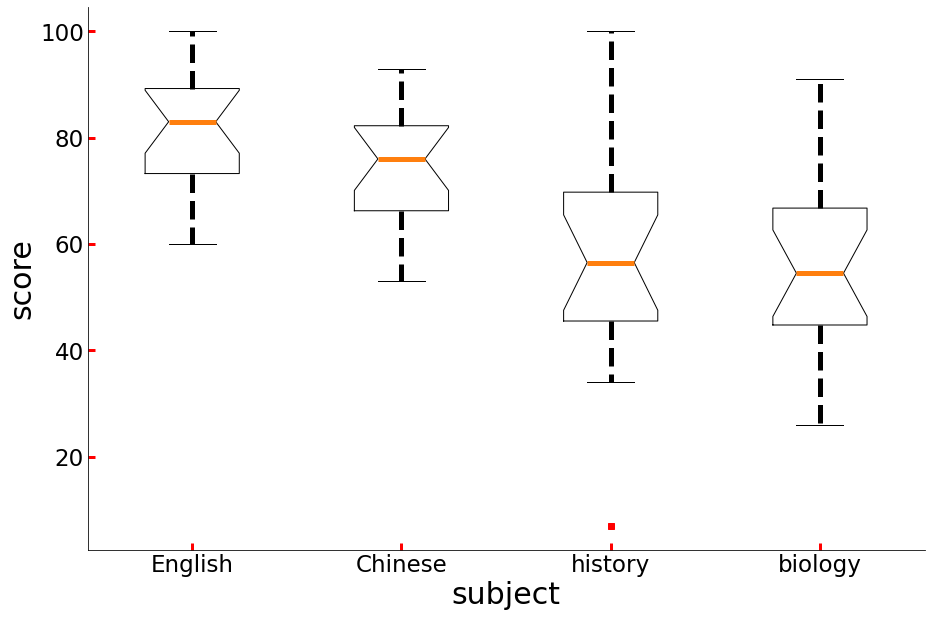

In [11]:
def boxplot_custom(data_dict,**args):
    '''
    根据matplotlib库的箱型图打印方法，自定义箱型图可调整的打印样式。 

    Parameters
    ----------
    data_dict : dict(list,numerical)
        字典结构形式的数据，键为横坐分类数据，值为数值列表.
    **args : keyword arguments
        可调整的箱型图样式参数包括['figsize',  'fontsize',  'frameOn',  'xlabel',  'ylabel',  'labelsize',  'tick_length',  'tick_width',  'tick_color',  'tick_direction',  'notch',  'sym',  'whisker_linestyle',  'whisker_linewidth',  'median_linewidth',  'median_capstyle'].

    Returns
    -------
    paras : dict
        样式更新后的参数值.

    '''
    import matplotlib.pyplot as plt
    
    #计算值提取
    data_keys=list(data_dict.keys())
    data_values=list(data_dict.values())     
    
    #配置与更新参数
    paras={'figsize':(10,10),
           'fontsize':15,
           'frameOn':['top','right','bottom','left'],
           'xlabel':None,
           'ylabel':None,
           'labelsize':15,
           'tick_length':7,
           'tick_width':3,
           'tick_color':'b',
           'tick_direction':'in',
           'notch':0,
           'sym':'b+',
           'whisker_linestyle':None,
           'whisker_linewidth':None,
           'median_linewidth':None,
           'median_capstyle':'butt'}
    
    print(paras)
    paras.update(args)
    print(paras)
    
    #根据参数调整打印图表样式
    plt.rcParams.update({'font.size': paras['fontsize']})
    frameOff=set(['top','right','bottom','left'])-set(paras['frameOn'])
   
 
    #图表打印
    fig, ax=plt.subplots(figsize=paras['figsize'])
    ax.boxplot(data_values,
               notch=paras['notch'],
               sym=paras['sym'],
               whiskerprops=dict(linestyle=paras['whisker_linestyle'],linewidth=paras['whisker_linewidth']),
               medianprops={"linewidth": paras['median_linewidth'],"solid_capstyle": paras['median_capstyle']})
    
    ax.set_xticklabels(data_keys) #配置X轴刻度标签
    for f in frameOff:
        ax.spines[f].set_visible(False) #配置边框是否显示
    
    #配置X和Y轴标签
    ax.set_xlabel(paras['xlabel'])
    ax.set_ylabel(paras['ylabel'])
    
    #配置X和Y轴标签字体大小
    ax.xaxis.label.set_size(paras['labelsize'])
    ax.yaxis.label.set_size(paras['labelsize'])
    
    #配置轴刻度样式
    ax.tick_params(length=paras['tick_length'],
                   width=paras['tick_width'],
                   color=paras['tick_color'],
                   direction=paras['tick_direction'])

    plt.show()    
    return paras
    
test_score_dic={"English":{"Mason":90,"Reece":81,'A':73,'B':97,'C':85,'D':60,'E':74,'F':64,'G':72,'H':67,'I':87,'J':78,'K':85,'L':96,'M':77,'N':100,'O':92,'P':86},
                "Chinese":{"Mason":71,"Reece":90,'A':79,'B':70,'C':67,'D':66,'E':60,'F':83,'G':57,'H':85,'I':93,'J':89,'K':78,'L':74,'M':65,'N':78,'O':53,'P':80},
                "history":{"Mason":73,"Reece":61,'A':74,'B':47,'C':49,'D':87,'E':69,'F':65,'G':36,'H':7,'I':53,'J':100,'K':57,'L':45,'M':56,'N':34,'O':37,'P':70},
                "biology":{"Mason":59,"Reece":73,'A':47,'B':38,'C':63,'D':56,'E':75,'F':53,'G':80,'H':50,'I':41,'J':62,'K':44,'L':26,'M':91,'N':35,'O':53,'P':68},
               }
test_score_lst_dic={subject:list(v_subject.values()) for subject,v_subject in test_score_dic.items()}
print(test_score_lst_dic)

print("--"*30)
_=boxplot_custom(test_score_lst_dic,
               figsize=(15,10),
               fontsize=23,
               frameOn=['bottom','left'],
               xlabel='subject',
               ylabel='score',
               labelsize='30',
               tick_color='r',
               notch=1,
               sym='rs',
               whisker_linestyle='--',
               whisker_linewidth=5,
               median_linewidth=5
              )

{'figsize': (10, 10), 'fontsize': 15, 'frameOn': ['top', 'right', 'bottom', 'left'], 'xlabel': None, 'ylabel': None, 'labelsize': 15, 'tick_length': 7, 'tick_width': 3, 'tick_color': 'b', 'tick_direction': 'in', 'notch': 0, 'sym': 'b+', 'whisker_linestyle': None, 'whisker_linewidth': None, 'median_linewidth': None, 'median_capstyle': 'butt'}
{'figsize': (10, 10), 'fontsize': 15, 'frameOn': ['top', 'right', 'bottom', 'left'], 'xlabel': None, 'ylabel': None, 'labelsize': 15, 'tick_length': 7, 'tick_width': 3, 'tick_color': 'b', 'tick_direction': 'in', 'notch': 0, 'sym': 'b+', 'whisker_linestyle': None, 'whisker_linewidth': None, 'median_linewidth': None, 'median_capstyle': 'butt'}


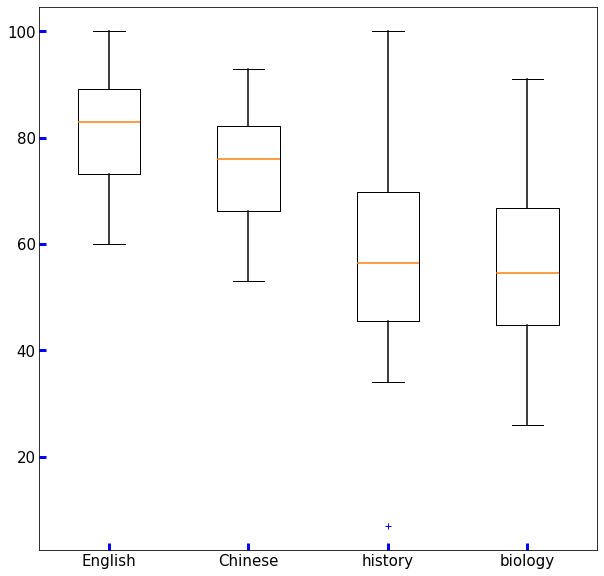

In [13]:
_=boxplot_custom(test_score_lst_dic,)


自动生成了新的一组数据`random_val_dict`，调用该函数执行箱型图打印，输入参数仅随意配置了边框显示与中位数横线的线型宽度。

{'figsize': (10, 10), 'fontsize': 15, 'frameOn': ['top', 'right', 'bottom', 'left'], 'xlabel': None, 'ylabel': None, 'labelsize': 15, 'tick_length': 7, 'tick_width': 3, 'tick_color': 'b', 'tick_direction': 'in', 'notch': 0, 'sym': 'b+', 'whisker_linestyle': None, 'whisker_linewidth': None, 'median_linewidth': None, 'median_capstyle': 'butt'}
{'figsize': (10, 10), 'fontsize': 15, 'frameOn': ['bottom', 'left'], 'xlabel': None, 'ylabel': None, 'labelsize': 15, 'tick_length': 7, 'tick_width': 3, 'tick_color': 'b', 'tick_direction': 'in', 'notch': 0, 'sym': 'b+', 'whisker_linestyle': None, 'whisker_linewidth': None, 'median_linewidth': 5, 'median_capstyle': 'butt'}


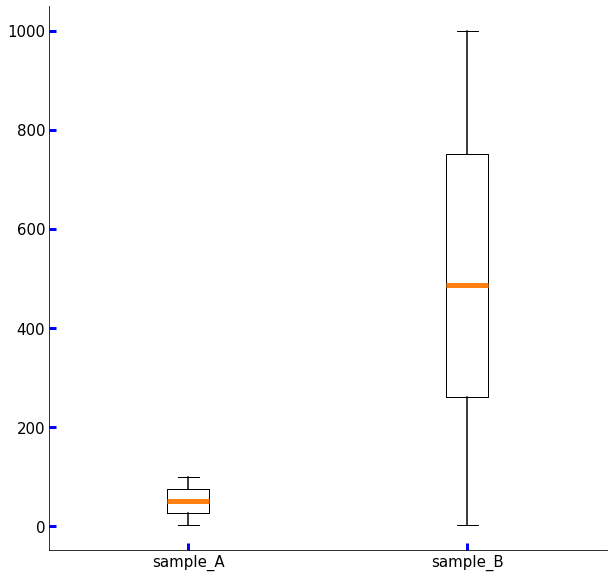

In [19]:
import numpy as np
random_val_dict={'sample_A':np.random.randint(low=1, high=100, size=1000),'sample_B':np.random.randint(low=1, high=1000, size=1000)
}
_=boxplot_custom(random_val_dict,frameOn=['bottom','left'],median_linewidth=5)

<span style = "color:Teal;background-color:;font-size:20.0pt">是否完成PCS_5(&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;)</span>